<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_14_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第14回講義 画像処理の基礎
### 1.画像処理の基礎
### 2.特徴の抽出法

## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [1]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       imports-85.csv	   wine.csv
'3(00001).txt'	 breast-cancer-wisconsin.csv   iris.csv		   ファイル_000
'3(00002).txt'	 example.xlsx		       titanic_train.csv
'3(00003).txt'	 img			      'wine 2.csv'


# 1.画像処理の基礎

###画像の読み込み

(3456, 4608, 3)


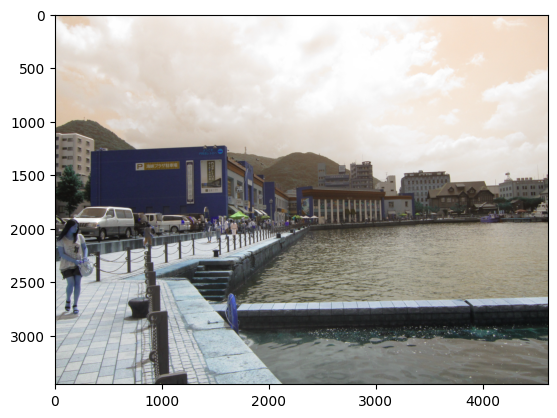

In [6]:
#python opencvによる画像読み込み
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#画像を読み込む関数imread
img = cv2.imread('/content/drive/MyDrive/DataScience/img/img000.JPG')

#画像サイズ（縦、横）とチャンネル数を取得
print(img.shape)

#画像の表示
plt.imshow(img)
plt.show()

In [7]:
h, w, c= img.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

height:  3456
width:   4608
channel: 3


In [8]:
#画像の数値配列表示
img

array([[[234, 226, 219],
        [235, 227, 220],
        [235, 227, 220],
        ...,
        [234, 213, 192],
        [234, 213, 192],
        [232, 211, 190]],

       [[234, 226, 219],
        [234, 226, 219],
        [235, 227, 220],
        ...,
        [233, 212, 191],
        [233, 212, 191],
        [232, 211, 190]],

       [[233, 225, 218],
        [233, 225, 218],
        [234, 226, 219],
        ...,
        [234, 213, 192],
        [233, 212, 191],
        [232, 211, 190]],

       ...,

       [[168, 181, 183],
        [172, 185, 187],
        [171, 185, 184],
        ...,
        [110, 113, 111],
        [112, 115, 113],
        [115, 118, 116]],

       [[172, 181, 185],
        [173, 182, 186],
        [169, 179, 179],
        ...,
        [107, 109, 109],
        [108, 111, 109],
        [112, 115, 113]],

       [[171, 177, 182],
        [171, 177, 182],
        [166, 174, 174],
        ...,
        [107, 109, 109],
        [107, 109, 109],
        [109, 111, 111]]

##色の並びを変更

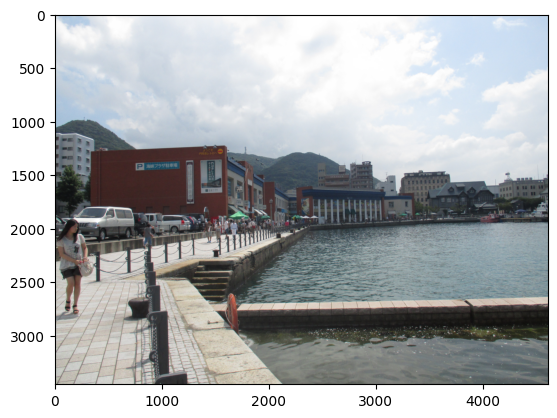

In [9]:
#色の並びを変更 BGR→RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

##グレイスケールに変更

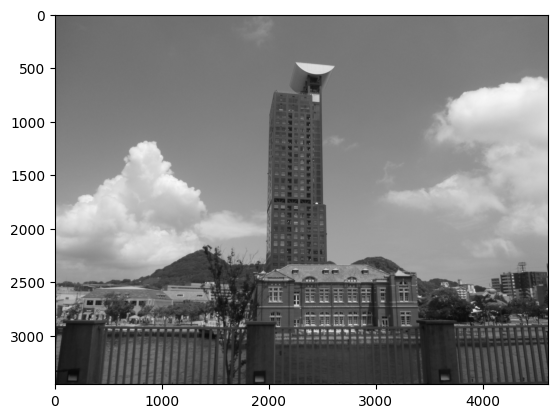

In [10]:
#グレイスケールによる表示
img_gray = cv2.imread('/content/drive/MyDrive/DataScience/img/img001.JPG', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap='gray')
plt.show()

In [11]:
# グレイスケール画像の縦と横
h, w = img_gray.shape
print('height: ', h)
print('width:  ', w)

height:  3456
width:   4608


##画像サイズの変更 resize

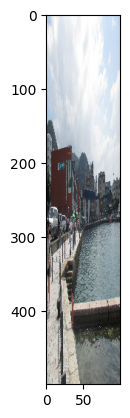

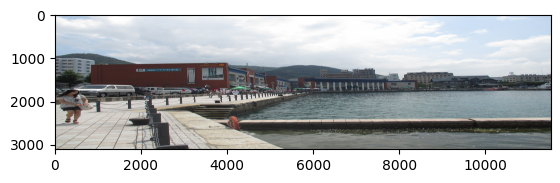

In [12]:
#画像サイズの変換resize
img_resize = cv2.resize(img_rgb, dsize=(100,500))
plt.imshow(img_resize)
plt.show()

# fxでx方向の倍率，fyでy方向の倍率を指定
img_resize = cv2.resize(img_rgb,dsize=None,fx=2.5,fy=0.9,interpolation=cv2.INTER_NEAREST)
plt.imshow(img_resize)
plt.show()

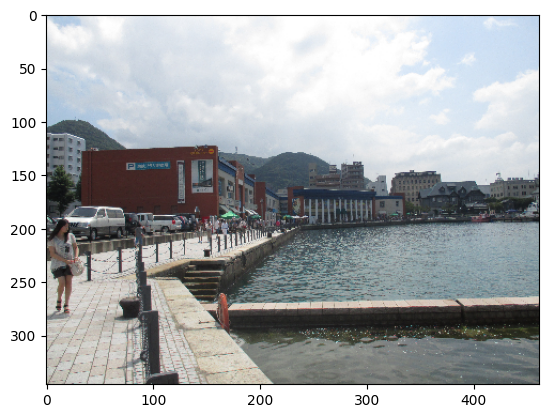

In [13]:
# interpolationでリサイズ処理の方法を指定
# デフォルトは INTER_LIEAR
img_resize = cv2.resize(img_rgb,dsize=None,fx=0.1,fy=0.1,interpolation=cv2.INTER_LINEAR)
plt.imshow(img_resize)
plt.show()

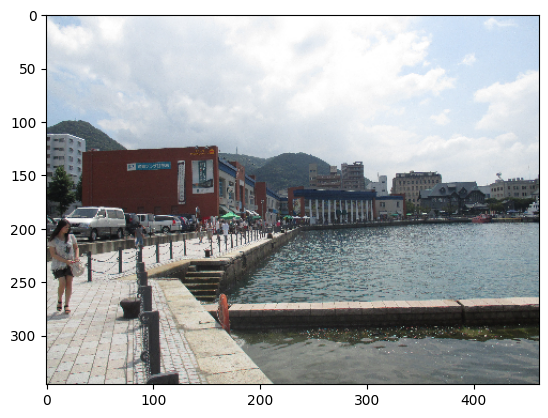

In [14]:
img_resize = cv2.resize(img_rgb,dsize=None,fx=0.1,fy=0.1,interpolation=cv2.INTER_NEAREST)
plt.imshow(img_resize)
plt.show()

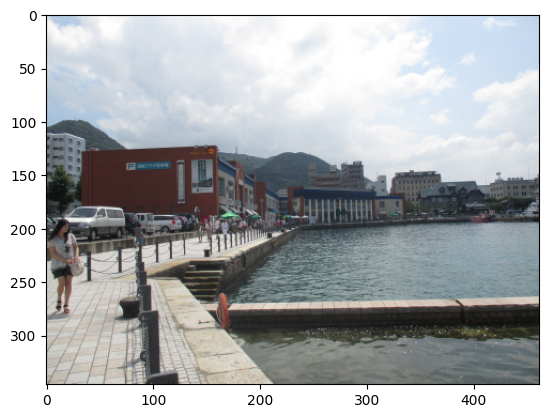

In [15]:
img_resize = cv2.resize(img_rgb,dsize=None,fx=0.1,fy=0.1,interpolation=cv2.INTER_AREA)
plt.imshow(img_resize)
plt.show()

##画像の保存

In [16]:
# 色の変更　RBG→BGR
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

# 画像の保存
cv2.imwrite('/content/drive/MyDrive/DataScience/img/written.jpg', img_bgr)

True

##画素値の取得

In [17]:
#画素値の取得（x,y）座標
x=100
y=100
img[y][x]

array([236, 230, 223], dtype=uint8)

####演習１

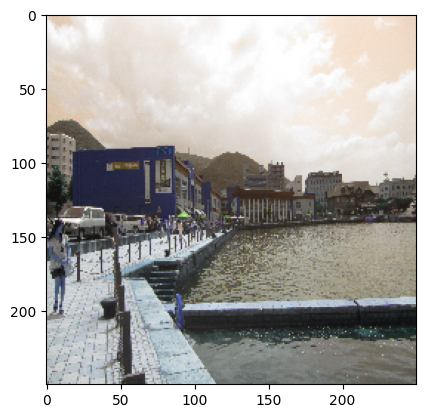

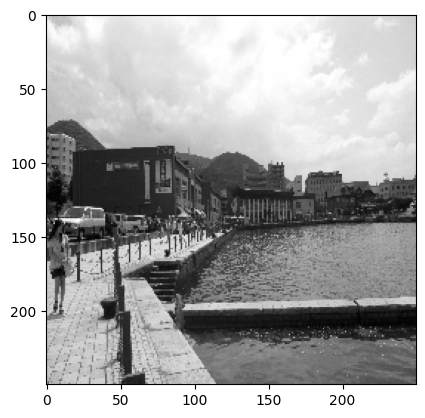

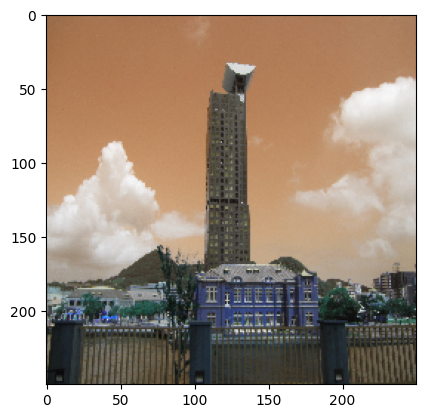

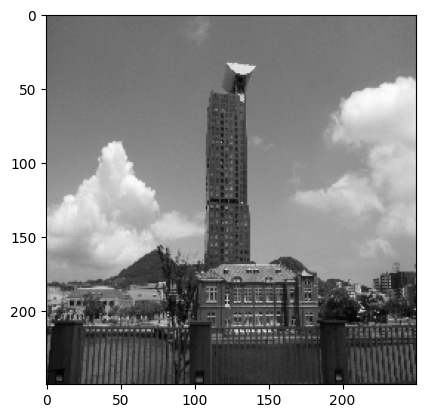

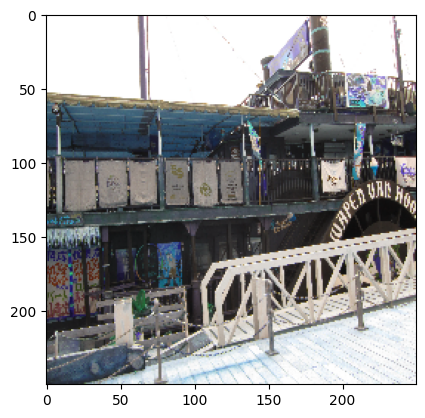

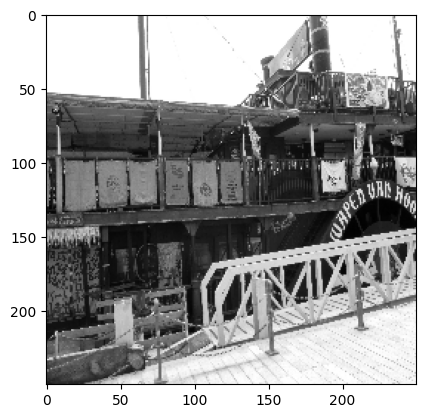

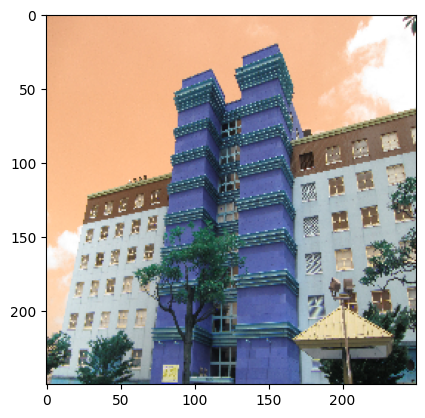

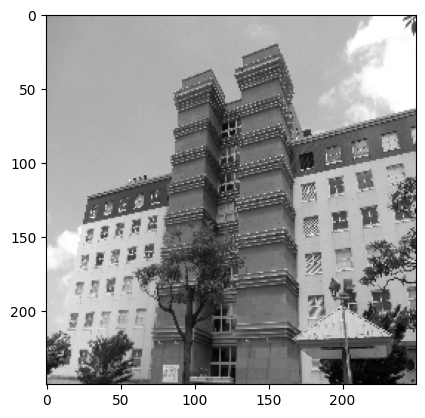

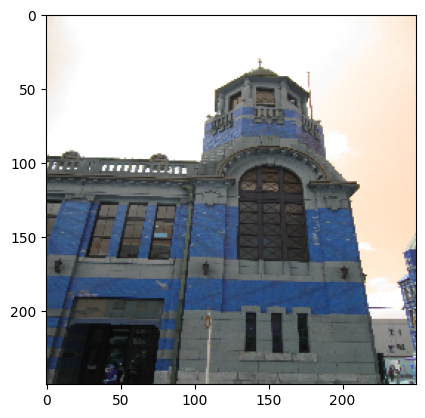

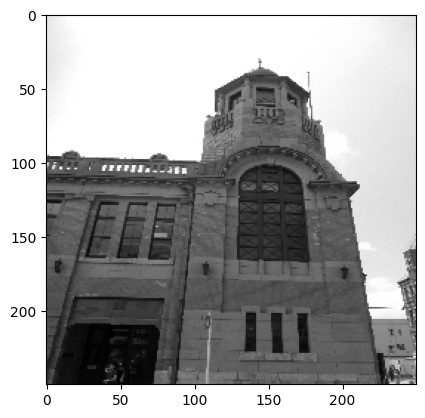

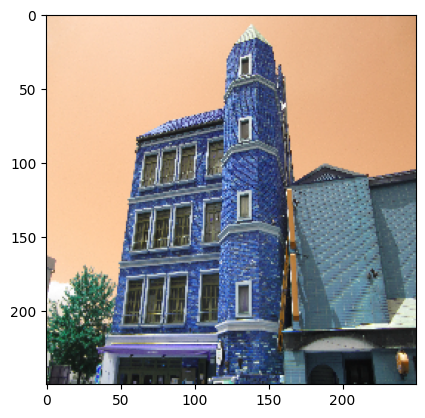

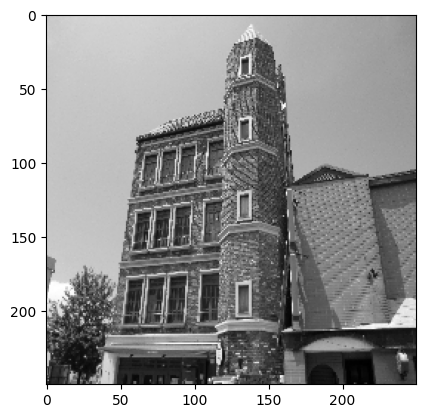

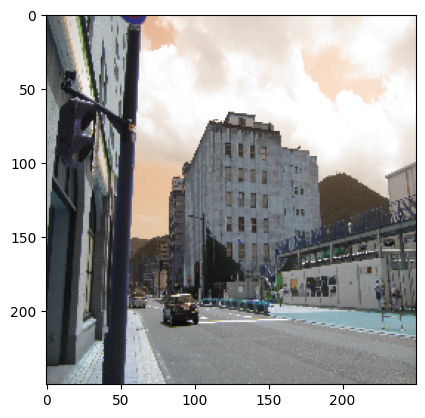

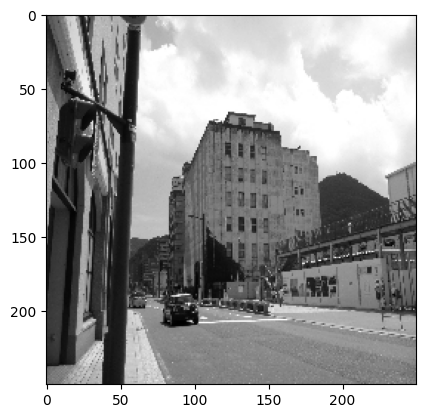

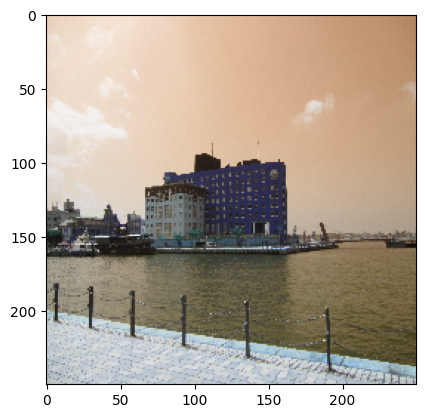

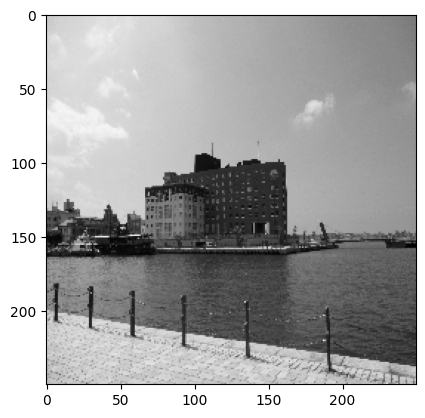

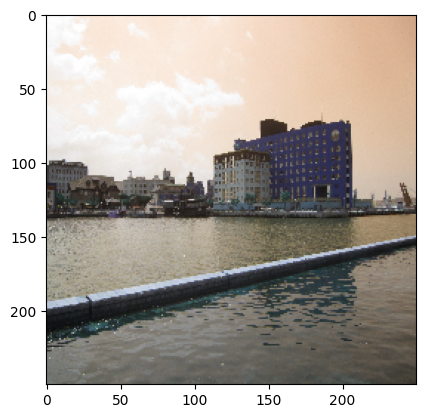

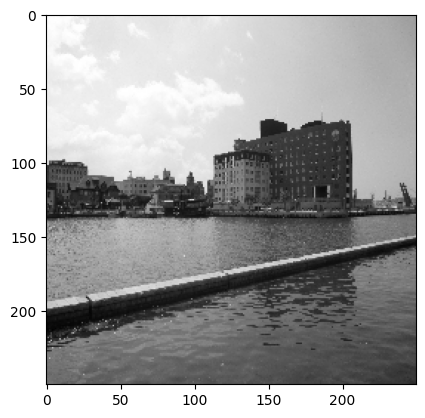

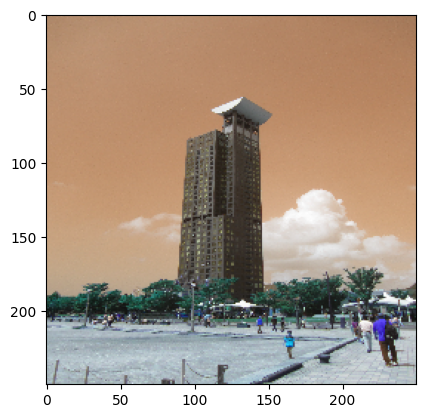

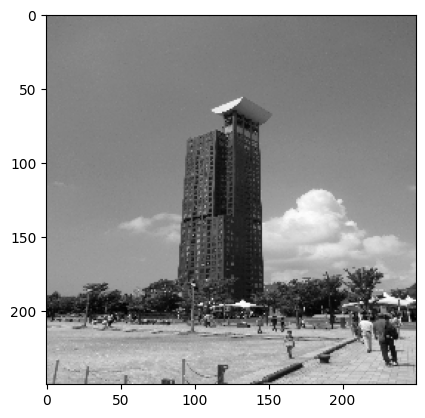

In [30]:
#演習１(1)画像10枚を読み込んで、サイズを（250,250）に統一する。読み込む画像は何でもよい。
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

%matplotlib inline

# 画像フォルダ
img_dir = "/content/drive/MyDrive/DataScience/img"
img_paths = sorted(glob.glob(os.path.join(img_dir, "*.JPG")))
img_paths = img_paths[:10]
processed_imgs = []
for p in img_paths:
    img_resize = cv2.imread(p)
    img_resize = cv2.resize(img_resize, (250, 250))
    plt.imshow(img_resize)
    plt.show()

#演習１(2) (1)の画像を全てグレースケールにする

    img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray, cmap="gray")
    plt.show()




##画像の回転

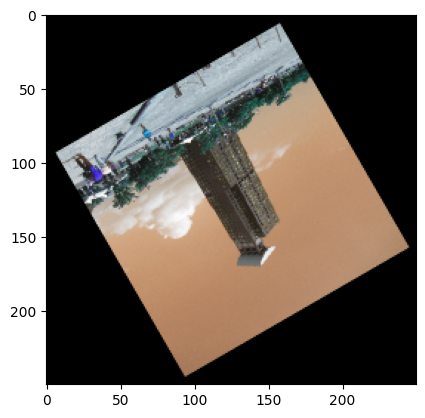

In [31]:
#画像の回転
angle = 210.0
scale = 0.7

size = tuple([img_resize.shape[1], img_resize.shape[0]])
center = tuple([int(size[0]/2), int(size[1]/2)])

rm = cv2.getRotationMatrix2D(center, angle, scale)

imgA = cv2.warpAffine(img_resize, rm, size)
plt.imshow(imgA)
plt.show()

##画像のトリミング

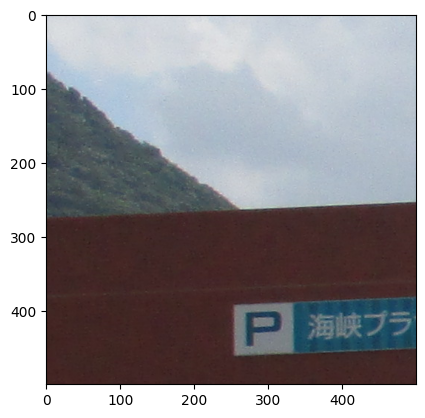

In [32]:
#画像のトリミング（範囲指定）
obj = img_rgb[1000:1500, 500:1000]

#トリミングした画像の表示
plt.imshow(obj)
plt.show()

##画像に図形の挿入

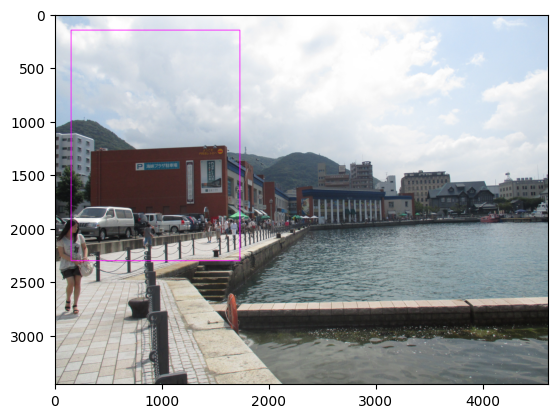

In [33]:
import copy
from PIL import Image, ImageFont, ImageDraw
#指定した範囲を四角で囲む
img2 = copy.deepcopy(img_rgb)
cv2.rectangle(img2, (150, 150), ((int)(img2.shape[0]/2), (int)(img2.shape[1]/2)), (255, 0, 255), 5)
plt.imshow(img2)
plt.show()

##複数の画像を並べて表示

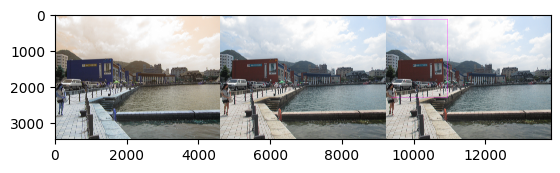

In [34]:
#画像を並べて表示(高さが同じ場合)
im_h = cv2.hconcat([img, img_rgb, img2])
plt.imshow(im_h)
plt.show()

##画像のヒストグラム化

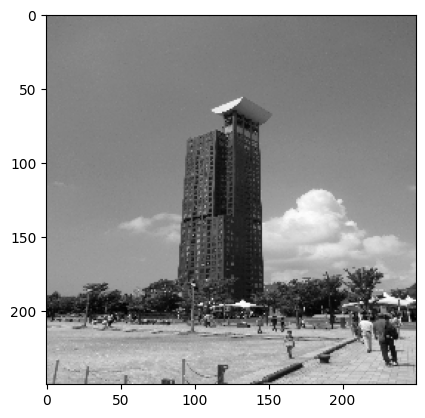

In [35]:
plt.imshow(img_gray, cmap='gray')
plt.show()

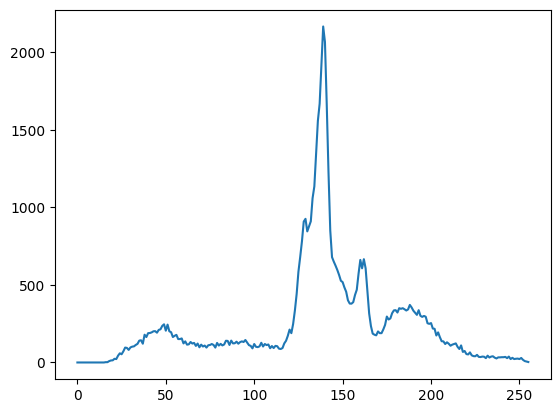

In [36]:
#画像のヒストグラム化　グレイスケール
# cv2.calcHist(image, channel, mask, histsize, range)
hist_values = cv2.calcHist([img_gray],channels=[0],
                           mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)
plt.show()

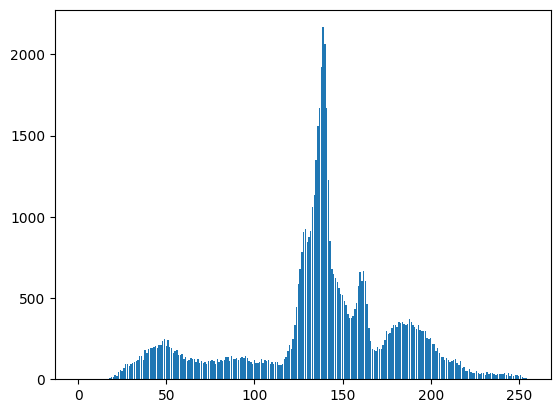

In [37]:
#棒グラフ化
ranges= np.arange(256)
hist_values = np.reshape(hist_values,-1)
plt.bar(ranges,hist_values)
plt.show()

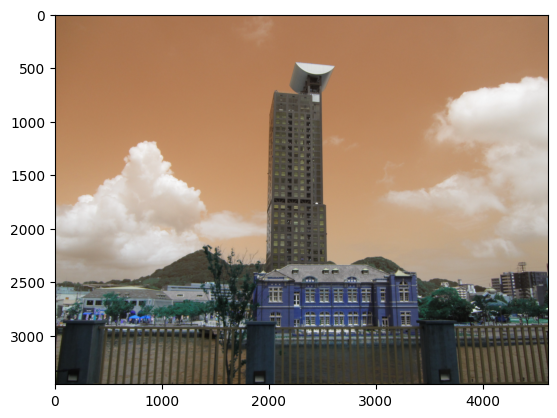

In [38]:
#画像を読み込む関数imread
img = cv2.imread('/content/drive/MyDrive/DataScience/img/img001.JPG')
plt.imshow(img)
plt.show()

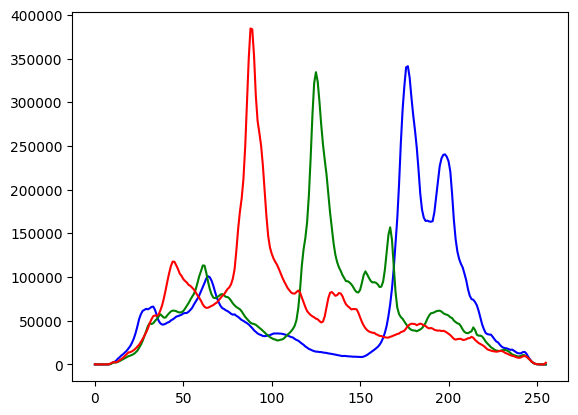

In [39]:
#画像のヒストグラム化 カラー
hist_valuesB = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_valuesG = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_valuesR = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_valuesB,color='blue')
plt.plot(hist_valuesG,color='green')
plt.plot(hist_valuesR,color='red')
plt.show()

####演習２

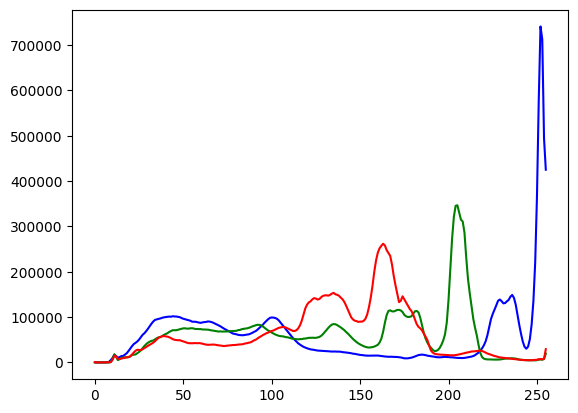

In [40]:
#自分の持っている画像を何でもよいのでカラーでのヒストグラム化を行う
img = cv2.imread('/content/drive/MyDrive/DataScience/img/img005.JPG')
#画像のヒストグラム化 カラー
hist_valuesB = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_valuesG = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_valuesR = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_valuesB,color='blue')
plt.plot(hist_valuesG,color='green')
plt.plot(hist_valuesR,color='red')
plt.show()



#2.画像の特徴の抽出

##opencvで使える主な特徴量抽出モデルの一覧

In [41]:
#opencvで使える主な特徴量抽出モデルの一覧
# HOG
detector = cv2.HOGDescriptor()
# AgastFeatureDetector
detector = cv2.AgastFeatureDetector_create()
# FAST
detector = cv2.FastFeatureDetector_create()
# MSER
detector = cv2.MSER_create()
# AKAZE
detector = cv2.AKAZE_create()
# BRISK
detector = cv2.BRISK_create()
# KAZE
detector = cv2.KAZE_create()
# ORB (Oriented FAST and Rotated BRIEF)
detector = cv2.ORB_create()
# SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create()

##akazeによる特徴の抽出

In [42]:
#画像を読み込む関数imread
img = cv2.imread('/content/drive/MyDrive/DataScience/img/tree000.JPG')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#画像のトリミング（範囲指定）
img_rgb = img_rgb[0:300, 0:300]

#akazeによる特徴点の抽出
detector = cv2.AKAZE_create()
keypoint = detector.detect(img_rgb)
img1 = cv2.drawKeypoints(img_rgb, keypoint, None, flags=4)

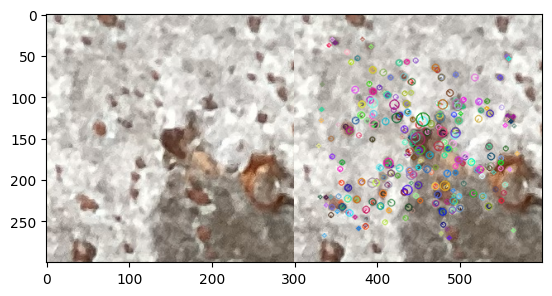

In [43]:
#画像を並べて表示
im_h = cv2.hconcat([img_rgb, img1])
plt.imshow(im_h)
plt.show()